In [1]:
# importando bibliotecas que serão utilizadas
# é uma boa pratica de programação importa-las 
# no inicio e não no meio do código

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sns.set() #apenas para deixar o plot mais "bonitinho" com fundo cinza e com grid

In [2]:
#definindo a função para calculo do erro quadratico medio (root mean-square error)
def rmse(a, b):
    return np.sqrt(np.mean((a - b) ** 2)) # o **2 significa elevar ao quadrado os elementos do vetor e sqrt é a função raiz quadrada

# funcao a qual o modelo devera aproximar (funcao seno)
def function(x):
    y = np.sin(2 * np.pi * x)
    return y

#função x^6
def function2(x):
#     y = np.power(x, 6)
    y = x ** 6
    return y

In [25]:
# Numerical Python - NumPy
# http://www.opl.ufc.br/pt/post/numpy/

v = np.array([1,2,3,4], dtype='float64').reshape(-1,1)
print("v:",v)
print("\nType:",type(v))
print("Dtype:",v.dtype)
print("\nShape:",v.shape)
print('\nNúmero de dimensões = ', v.ndim)
print('Número de elementos = ', v.size)

v: [[1.]
 [2.]
 [3.]
 [4.]]

Type: <class 'numpy.ndarray'>
Dtype: float64

Shape: (4, 1)

Número de dimensões =  2
Número de elementos =  4


### 1 - Para um polinômio de grau $M=9$, avalie como o erro se comporta quando aumentamos o tamanho do conjunto de treinamento. Considere N=10 até 1000. Ou seja, faça um gráfico de N versus o erro quadrático médio (RMSE).

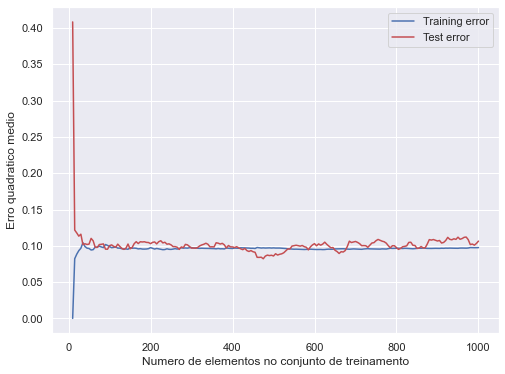

In [26]:
errors_train = []
errors_test = []

n_trains = np.arange(10, 1001, 5)
n_test = 100

for n_train in n_trains:
    # Para cada iteraçao definimos novamente a semente
    # para garantir que cada modelo utilizara os mesmos
    # valores aleatorios
    np.random.seed(1337)
    
    # Gera o conjunto de treinamento (features + target)
    X_train = np.linspace(0, 1, n_train) #gerando elementos igualmente espaçados entre 0 e 1
    y_train = function(X_train) + np.random.normal(0, 0.1, n_train) #adcionando um pequeno ruído a cada valor para não ficar exatamente no valor da função
    
    # Gera o conjunto de teste (features + target)
    X_test = np.linspace(0, 1, n_test)
    y_test = function(X_test) + np.random.normal(0, 0.1, n_test)
    
    # Instancia a função que "extrai as features polinomiais"
    pf = PolynomialFeatures(degree=9)
    
    # Extrai as features polinomais nos dois conjuntos de dados 
    #(nesse caso uma matriz onde a primeira coluna e o x^0, na segunda x^1 até x^degree)
    # o reshape é utilizado apenas para passar o vetor de 1 dimensão para 2 dimensões pois é requerido pela função fit_transform
    X_train_pf = pf.fit_transform(X_train.reshape(-1, 1))
    X_test_pf  = pf.fit_transform(X_test.reshape(-1, 1))
    
    # Ajusta o modelo de regressao linear aos dados transformados
    model = LinearRegression()

    #realiza o treinamento, isto é ajusta os pesos para a função que será utilizada para predizer os valores
    model.fit(X_train_pf, y_train)  
    
    # Usa o modelo treinado para prever os valores
    # nos dois conjuntos de dados
    y_train_pred = model.predict(X_train_pf)
    y_test_pred  = model.predict(X_test_pf)
    
    # Calcula o Erro Quadratico Médio para os dois conjuntos de dados
    error_train = rmse(y_train, y_train_pred)
    error_test  = rmse(y_test, y_test_pred)
    
    # Armazena o erro do conjunto de dados de tamanho n_train
    errors_train.append(error_train)
    errors_test.append(error_test)


plt.figure(figsize=(8, 6)) #define o tamanho da figura de plot
#plota no eixo x o vetor com os valores de treino, no eixo y os erros associados,
# 'b-' significa que será uma linha azul e label a legenda da linha
plt.plot(n_trains, errors_train, 'b-', label = 'Training error')
plt.plot(n_trains, errors_test, 'r-', label = 'Test error')

#atribuindo titulo nos eixos
plt.xlabel('Numero de elementos no conjunto de treinamento')
plt.ylabel('Erro quadratico medio')
#mostrando a legenda
plt.legend()
#mostrando o grafico
plt.show()

*  Note que a medida que o conjunto de dados cresce reduz a chance de overfitting. No inicio o valor do erro é bem grande no conjunto de teste e perto de zero no conjunto de treinamento, o que indica overfitting. A medida que o conjunto de treino é aumentado isso deixa de acontecer pois o comportamento dos dois conjuntos de dados é proximo 

### 2 - Troque a função seno por $x^6$ nos exemplos acima e realize a mesma análise apresentada nessa aula.

Nessa aula vamos aprender a ajustar modelos e verificar quando ocorre overfitting. Vamos fazer o ajuste de um conjunto de pontos a partir de um polinômio, usando um método de regressão linear, que veremos em detalhes nas próximas aulas.

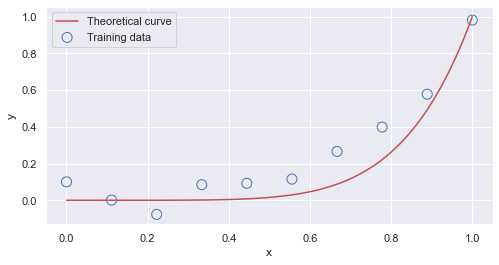

In [27]:
# numero de amostras para o conjunto de treino
n_train = 10
n_test = 10

# gera o conjunto de treino com valores no intervalo 0 e 1
X_train = np.linspace(0, 1, n_train)
y_train = function2(X_train) + np.random.normal(0, 0.1, n_train)

# O conjunto de teste é criado da mesma forma que os conjunto de treino
X_test = np.linspace(0, 1, n_test)
y_test = function2(X_test) + np.random.normal(0, 0.1, n_test)

# Visualizacao do ajuste teorico
# Utilizando a funcao original plotamos a curva (vermelho) real
# Note que os valores de treinamento (azul) estao ligeiramente fora da curva real devido ao ruido adicionado
X_theoretical = np.linspace(0, 1, 100)
y_theoretical = function2(X_theoretical)

# O codigo abaixo realiza o plot. 
#A função scatter está plotando nosso conjunto de treino (azul). 
#O "plt.plot" está plotando nossa funcao original (vermelha)
#os demais parametros são coisas que afetam mais a estética dos graficos em si

fig = plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_theoretical, y_theoretical, '-r', label="Theoretical curve")

plt.legend()
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, mas a mostramos para entender como os dados são gerados.

Vamos fazer o ajuste usando um polinômio de grau $M$. Inicialmente, vamos considerar $M=1$, ou seja, um ajuste linear.

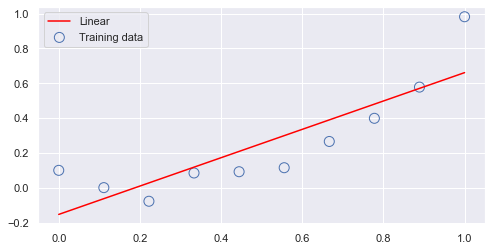

In [28]:
# usa regressão linear para ajustar o modelo
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# gera o conjunto de plot e preve os valores de y. 
# OBS: a funcao reshape vai transformar nosso vetor para que ele possa ser usado na funcao predict
X_example = np.linspace(0, 1, 200) 
y_pred = model.predict(X_example.reshape(-1, 1))

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(X_example, y_pred, label='Linear', color = 'red')
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="Training data")
plt.legend()
plt.show(True)

Notamos que, nesse caso, o ajuste é muito ruim, pois os dados foram gerados a partir de uma função não-linear.

Vamos fazer o ajuste usando um polinômio de grau $M=3$. Veja a função para gerar o polinômio: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

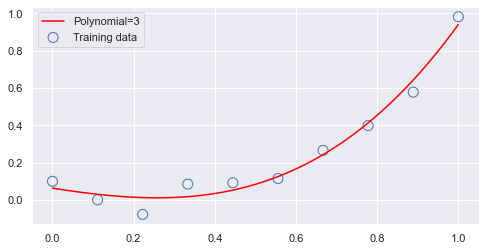

In [29]:
# Gera uma nova matriz de features consistindo de todas as combinacoes polinomiais das features
#com grau menor ou igual ao especificado
pf3 = PolynomialFeatures(degree=3)
X_train_pf3 = pf3.fit_transform(X_train.reshape(-1, 1))

# Treina o modelo linear com das features geradas
model = LinearRegression()
model.fit(X_train_pf3, y_train)

# Gera as mesmas features polinomiais no conjunto de plot
X_example_pf3 = pf3.fit_transform(X_example.reshape(-1, 1))
y_pred = model.predict(X_example_pf3)

# Mostra o ajuste feito pelo modelo linear com as novas features polinomiais geradas
fig = plt.figure(figsize=(8, 4))
plt.plot(X_example, y_pred, label='Polynomial=3', color = 'red')
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="Training data")
plt.legend()
plt.show(True)

Nesse caso, o ajuste reproduz melhor a tendência observada nos dados.

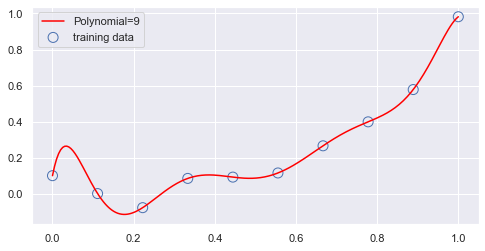

In [33]:
# Gera as features polinomiais de grau 9
pf9 = PolynomialFeatures(degree=9)
X_train_pf9 = pf9.fit_transform(X_train.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train_pf9, y_train)

X_example_pf9 = pf9.fit_transform(X_example.reshape(-1, 1))
y_pred = model.predict(X_example_pf9)

fig = plt.figure(figsize=(8, 4))
plt.plot(X_example, y_pred, label='Polynomial=9', color = 'red')
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="training data")
plt.legend()
plt.show(True)

* Para um polinômio de grau $M=9$, a curva se ajusta a todos os pontos. Em princícipio, esse parece ser o melhor ajuste.
* O ajuste foi feito no conjunto de treinamento. Precisamos agora analisar a capacidade de generalização do modelo. Para isso, vamos fazer a previsão em novos dados, ou seja, no conjunto de teste.
* Vamos analisar o erro na predição em função do grau do polinômio. O erro é calculando quando consideramos o conjunto de treinamento e teste.


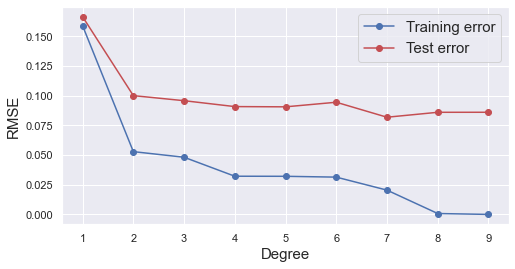

In [34]:
# criamos os vetores para salvar os valores do erro e os graus de polinomio usados
errors_train = []
errors_test  = []

#criando um vetor [1, 2, ..., 10]
degrees = np.arange(1, 10)

for M in degrees:
    
    # Gera features polinomiais
    pf = PolynomialFeatures(degree=M) 
    X_train_pf = pf.fit_transform(X_train.reshape(-1, 1))
    X_test_pf  = pf.fit_transform(X_test.reshape(-1, 1))
    
    # treinamento
    model = LinearRegression()
    model.fit(X_train_pf, y_train)
    
    # Calcula nosso erro considerando a base de treino e teste
    y_train_pf_pred = model.predict(X_train_pf)
    y_test_pf_pred  = model.predict(X_test_pf)
    
    error_train = rmse(y_train, y_train_pf_pred)
    error_test  = rmse(y_test, y_test_pf_pred)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    
fig = plt.figure(figsize=(8, 4))
plt.plot(degrees, errors_train, 'b-o', label = 'Training error')
plt.plot(degrees, errors_test, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Notem que o erro na predição, quando usamos o conjunto de teste, tende a aumentar quando aumentamos o grau do polinômio, ou seja, quando aumentamos a complexidade do modelo. Essa é uma indicação de overfitting (veja material da aula teórica). Overfitting ocorre quando há um aumento no erro calculado no conjunto de teste. Notem que o erro no conjunto de treinamento vai a zero quando aumentamos o grau do polinômio. Nesse caso, a curva se ajusta a todos os pontos, como vimos anteriormente para $M = 9$.

Se aumentarmos o número de elementos no conjunto de treinamento, reduzimos o overfitting. Ou seja, precisamos balancear a complexidade do modelo de acordo com o volume de dados disponíveis. Vamos gerar os dados como anteriormente, mas com mais pontos.

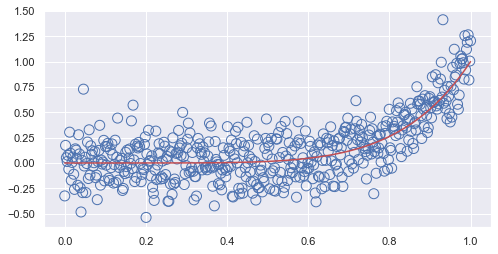

In [35]:
n_train = 500
n_test = 500

X_train = np.linspace(0, 1, n_train)
y_train = function2(X_train) + np.random.normal(0, 0.2, n_train)

X_test = np.linspace(0, 1, n_test)
y_test = function2(X_train) +  np.random.normal(0, 0.2, n_test)

# Curva teorica
X_theoretical = np.linspace(0, 1, n_test)
y_theoretical = function2(X_theoretical)

fig = plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="Training data")
plt.plot(X_theoretical, y_theoretical, '-r')
plt.show(True)

Para um polinômio de grau $M=9$, vemos que com mais pontos, overfitting deixa de ocorrer.

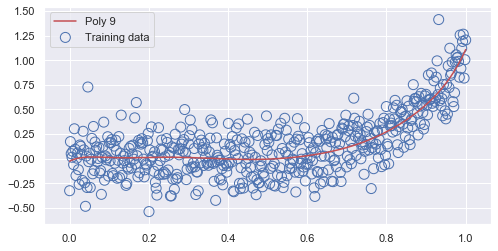

In [10]:
# Novamente, vamos usar as mesmas funcoes para polinomial de grau 9
pf9 = PolynomialFeatures(degree=9)
X_train_pf9 = pf9.fit_transform(X_train.reshape(-1, 1))

# Regressao linear
model = LinearRegression()
model.fit(X_train_pf9, y_train)

X_example_pf9 = pf9.fit_transform(X_example.reshape(-1, 1))
y_pred = model.predict(X_example_pf9)

fig = plt.figure(figsize=(8, 4))
plt.plot(X_example, y_pred, '-r',  label='Poly 9')
plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=100, label="Training data")
plt.legend()
plt.show(True)

Podemos até usar polinômios de grau maior. Analisando o erro em função do grau do polinômio, vemos que ocorre overfitting apenas para polinômios de grau muito alto.

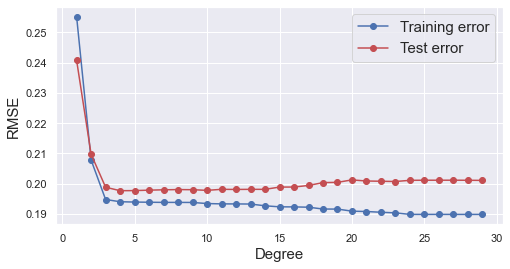

In [36]:
errors_train = []
errors_test = []

degrees = np.arange(1, 30)

for M in degrees:

    pf = PolynomialFeatures(degree=M)
    X_train_pf = pf.fit_transform(X_train.reshape(-1, 1))
    X_test_pf  = pf.fit_transform(X_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_train_pf, y_train)
    
    y_train_pred = model.predict(X_train_pf)
    y_test_pred  = model.predict(X_test_pf)
    
    error_train = rmse(y_train, y_train_pred)
    error_test  = rmse(y_test, y_test_pred)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    

fig = plt.figure(figsize=(8, 4))
plt.plot(degrees, errors_train, 'b-o', label = 'Training error')
plt.plot(degrees, errors_test, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Ou seja, quanto mais dados estiverem disponíveis, maior pode ser a complexidade do modelo. Temos que ter uma balanço entre complexidade do modelo e dados disponíveis.

### 3) Verifique como a acurácia muda em função do número de grupos k na validação cruzada, conforme feito acima, para a base de dados Vehicle.

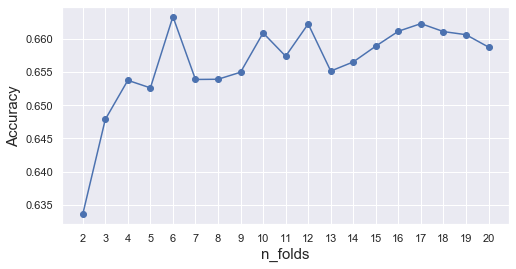

In [12]:
# Faz a leitura do conjunto de dados Vehicle 
# para isso estamos utilizando a bilbioteca pandas e a funcao 
# pd.read_csv, ela aceita como argumento o caminho até o arquivo
# a partir da onde está o notebook. No meu caso ele está dentro da pasta data
df = pd.read_csv('data/Vehicle.csv')

# Separa as features do rotulo
# como o target é a feature Class, estou atribuindo a coluna
# da minha tabela com as classes para a variavel y
y = df['Class'] 

#estou atribuindo as demais columnas (todas exceto class para a minha variavel X)
X = df.drop(columns='Class')

# Define o numero de folds
n_folds_values = np.arange(2, 21)

# Lista para armazenar a média de acuracia 
cv_means = []

for n_folds in n_folds_values:
    
    #inicio o modelo de KNN passando 3 vizinhos (escolhido arbitrariamente) 
    #com a medida euclidiana para calculo de distancia
    model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    
    #funcao que recebe o modelo, o conjunto X, o conjunto y e uma medida de 
    # calculo, no caso estamos considerando a acuracia por ser um problema de classificacao
    # e o numero de folds
    cv_result = cross_validate(model, X, y, scoring='accuracy', cv=n_folds)
    
    # a funcao cross_valiadade retorna um dicionario com alguns elementos
    # como estamos interessados na acuracia de teste utilizamos cv_result['test_score']
    # ela retorna um vetor com a acuracia para cada split criado. ao final tiramos a media
    # daquele numero de folds especifico
    cv_mean = cv_result['test_score'].mean()
    cv_means.append(cv_mean)

plt.figure(figsize=(8, 4))
plt.plot(n_folds_values, cv_means, '-bo')
plt.xlabel('n_folds', fontsize = 15)
plt.xticks(n_folds_values) #apenas para deixar explicito todos os pontos em x no grafico
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Podemos observar que o maior valor de acuracia é entre 5 e 10 folds, mas no geral a acuracia tem uma variação baixa (de 0.63 para 0.66 no melhor caso). 

### 4) Varie o número de folds para a base iris, de 2 até 20 e verifique se essa escolha influencia na classificação.

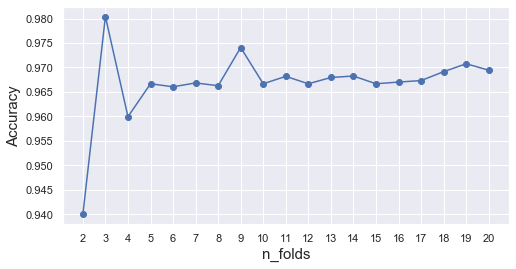

In [13]:
df = pd.read_csv('data/iris.csv')

# Separa as features do rotulo
y = df['species']
X = df.drop(columns='species')

# Define o numero de folds
n_folds_values = np.arange(2, 21)

# Lista para armazenar a média de acuracia 
cv_means = []

for n_folds in n_folds_values:
    model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    cv_result = cross_validate(model, X, y, scoring='accuracy', cv=n_folds)
    cv_mean = cv_result['test_score'].mean()
    cv_means.append(cv_mean)

plt.figure(figsize=(8, 4))
plt.plot(n_folds_values, cv_means, '-bo')
plt.xlabel('n_folds', fontsize = 15)
plt.xticks(n_folds_values)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

A mesma análise realizada na questão anterior se aplica a esse problema